In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('temp/因子建模数据.csv',encoding = 'GBK',engine = 'python')

In [3]:
data.head()

,股票编号,年份（年末）,总股本,每股资本公积,每股未分配利润,基本每股收益,基本每股收益同比增长(%),每股净资产,每股现金流,每股营业收入,...,批发和零售业,电力、热力、燃气及水生产和供应业,综合,采矿业,是否有行业龙头概念,股价（年末最后20个交易日收盘价加权平均）,股价年化波动率,本年送转比例,近两年送转比例平均,次年是否高送转
0,1,2,595979092.0,0.2015,1.1579,0.6299,43.7800,2.5222,0.5510,3.1231,...,0,0,0,0,0,5.812830,0.490998,0.00,0.000,0.0
1,1,3,595979092.0,0.2015,1.6314,0.5048,-19.8603,3.0249,0.3011,2.7169,...,0,0,0,0,0,7.159914,0.423839,0.25,0.125,0.0
2,1,4,595979092.0,0.2013,2.0567,0.7005,38.7678,3.4804,-0.2822,2.1283,...,0,0,0,0,0,9.088111,0.342857,0.22,0.235,0.0
3,1,5,595979092.0,0.2013,2.0695,0.2631,-62.4411,3.5235,0.2087,1.8078,...,0,0,0,0,0,13.947512,0.754430,0.08,0.150,0.0
4,1,6,595979092.0,0.2013,2.4189,0.5954,126.3018,4.0445,3.2283,3.4552,...,0,0,0,0,0,17.746007,0.561015,0.18,0.130,0.0


In [4]:
len(set(data['股票编号']))

3028

In [5]:
print('因子列表：')
for x in data.columns[2:-1]:
    print(x)

因子列表：
总股本
每股资本公积
每股未分配利润
基本每股收益
基本每股收益同比增长(%)
每股净资产
每股现金流
每股营业收入
摊薄净资产收益率同比增长(%)
净利润同比增长
上市年限
交通运输、仓储和邮政业
住宿和餐饮业
信息传输、软件和信息技术服务业
制造业
房地产业
批发和零售业
电力、热力、燃气及水生产和供应业
综合
采矿业
是否有行业龙头概念
股价（年末最后20个交易日收盘价加权平均）
股价年化波动率
本年送转比例
近两年送转比例平均


In [6]:
print('总样本：%d，正样本：%d，负样本：%d，正样本占比:%.4f'%(len(data),
                              np.sum(data['次年是否高送转']),
                              len(data) - np.sum(data['次年是否高送转']),
                              np.sum(data['次年是否高送转'])/len(data)))

总样本：13313，正样本：2062，负样本：11251，正样本占比:0.1549


In [7]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,2:-1]
#X.drop(axis = 0,columns = '股价年化波动率')
y = data.iloc[:,-1].astype(int).values.reshape(-1)

# 划分样本为训练集合测试集，以8：2划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


print('训练集：%d，训练集正样本：%d，训练集负样本：%d，正样本占比:%.4f'%(len(y_train),
                                    np.sum(y_train),
                                    len(y_train) - np.sum(y_train),
                                    np.sum(y_train)/len(y_train))
     )

print('测试集：%d，测试集正样本：%d，测试集负样本：%d,正样本占比:%.4f'%(len(y_test),
                                    np.sum(y_test),
                                    len(y_test) - np.sum(y_test),
                                    np.sum(y_test)/len(y_test))
     )

训练集：10650，训练集正样本：1677，训练集负样本：8973，正样本占比:0.1575
测试集：2663，测试集正样本：385，测试集负样本：2278,正样本占比:0.1446


In [58]:
X.corr()

,总股本,每股资本公积,每股未分配利润,基本每股收益,基本每股收益同比增长(%),每股净资产,每股现金流,每股营业收入,摊薄净资产收益率同比增长(%),净利润同比增长,...,房地产业,批发和零售业,电力、热力、燃气及水生产和供应业,综合,采矿业,是否有行业龙头概念,股价（年末最后20个交易日收盘价加权平均）,股价年化波动率,本年送转比例,近两年送转比例平均
总股本,1.000000,-0.053524,0.039614,0.063537,0.003103,0.008046,0.001683,0.004620,0.003968,0.000336,...,-0.004973,-0.018065,0.006045,-0.007181,0.060617,0.163855,-0.052974,-0.083384,-0.013105,-0.011855
每股资本公积,-0.053524,1.000000,0.213870,0.195940,0.026957,0.757984,0.161800,0.204353,0.023524,0.059125,...,-0.117404,-0.035090,-0.022498,-0.054540,-0.045459,0.004989,0.149708,-0.021944,0.340391,0.214800
每股未分配利润,0.039614,0.213870,1.000000,0.686363,0.136540,0.758288,0.149186,0.415577,0.163211,0.140960,...,0.048640,0.045391,-0.059724,-0.032167,0.031934,0.260064,0.252471,-0.069753,0.357743,0.333594
基本每股收益,0.063537,0.195940,0.686363,1.000000,0.371613,0.563821,0.213454,0.288050,0.349643,0.318690,...,0.024443,0.030902,0.005975,-0.029951,-0.040520,0.282209,0.274927,-0.104503,0.290242,0.322045
基本每股收益同比增长(%),0.003103,0.026957,0.136540,0.371613,1.000000,0.100256,0.061714,0.017963,0.888753,0.802539,...,0.015794,0.014466,0.013555,-0.001137,-0.023604,0.039380,0.040776,-0.011902,0.045342,0.052503
每股净资产,0.008046,0.757984,0.758288,0.563821,0.100256,1.000000,0.203403,0.414464,0.106411,0.126522,...,-0.040388,0.020207,-0.033463,-0.047777,-0.007293,0.176924,0.266838,-0.070399,0.440307,0.346831
每股现金流,0.001683,0.161800,0.149186,0.213454,0.061714,0.203403,1.000000,0.098408,0.035713,0.068616,...,0.054426,-0.001234,-0.009220,-0.015641,-0.014776,0.049469,0.174177,0.022661,0.178570,0.079769
每股营业收入,0.004620,0.204353,0.415577,0.288050,0.017963,0.414464,0.098408,1.000000,0.007188,0.037433,...,-0.062620,0.332561,-0.049573,-0.044548,0.001437,0.189062,0.084750,-0.098953,0.125865,0.076150
摊薄净资产收益率同比增长(%),0.003968,0.023524,0.163211,0.349643,0.888753,0.106411,0.035713,0.007188,1.000000,0.709877,...,0.006791,0.011640,0.003486,-0.001421,-0.026347,0.040936,0.033826,-0.008673,0.077747,0.086152
净利润同比增长,0.000336,0.059125,0.140960,0.318690,0.802539,0.126522,0.068616,0.037433,0.709877,1.000000,...,0.022122,0.007500,0.015421,-0.003412,-0.022923,0.041071,0.033382,0.004292,0.068351,0.061712


In [60]:
from sklearn.preprocessing import StandardScaler
# 逻辑回归需要对变量去量刚
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train_std = Scaler.transform(X_train)
X_test_std = Scaler.transform(X_test)



from sklearn.linear_model import LogisticRegression as LR

lr = LR() 
lr.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score,f1_score,recall_score
# 测试集上的预测
pred = lr.predict(X_test_std)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
print('算法：逻辑回归')
print('测试集预测结果：')

cover = mat[1,1]/np.sum(y_test)
acc = mat[1,1]/np.sum(pred)
cover_acc = np.sqrt(cover*acc)

raise_rate = acc/(np.mean(y_test))

print('预测高送转股票数：%d,实际高送转股票数：%d，准确预测的高送转股票数：%d'%(np.sum(pred),np.sum(y_test),mat[1,1]))
print('高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(y_test)))
print('高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(pred)))


print()
# 得到逻辑回归输出的概率得分
proba = lr.predict_proba(X_test_std)

pos_proba = [x[1] for x in proba]
eva = pd.DataFrame()
eva['模型输出概率得分'] = pos_proba
eva['实际是否在次年高送转'] = y_test

# 按照概率得分排序
eva.sort_values(by = '模型输出概率得分',ascending = False, inplace = True)

# 分别取前10，25，50，100位样本看准确率
max_10_acc = np.mean(eva['实际是否在次年高送转'].values[:10])
max_25_acc = np.mean(eva['实际是否在次年高送转'].values[:25])
max_50_acc = np.mean(eva['实际是否在次年高送转'].values[:50])
max_100_acc = np.mean(eva['实际是否在次年高送转'].values[:100])

tot_score = 0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc

print('高送转预测概率最高前10位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:10]),100*np.mean(eva['实际是否在次年高送转'].values[:10])))
print('高送转预测概率最高前25位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:25]),100*np.mean(eva['实际是否在次年高送转'].values[:25])))
print('高送转预测概率最高前50位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:50]),100*np.mean(eva['实际是否在次年高送转'].values[:50])))
print('高送转预测概率最高前100位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:100]),100*np.mean(eva['实际是否在次年高送转'].values[:100])))

print('综合得分(10%%覆盖率,50%%准确率,40%%预测概率前10,25,50,100位样本的准确预测率):%.5f'%tot_score)



算法：逻辑回归
测试集预测结果：
预测高送转股票数：134,实际高送转股票数：385，准确预测的高送转股票数：81
高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：21.04%
高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：60.45%

高送转预测概率最高前10位样本，实际高送转数量为：6，准确率：60.00%
高送转预测概率最高前25位样本，实际高送转数量为：13，准确率：52.00%
高送转预测概率最高前50位样本，实际高送转数量为：29，准确率：58.00%
高送转预测概率最高前100位样本，实际高送转数量为：59，准确率：59.00%
综合得分(10%覆盖率,50%准确率,40%预测概率前10,25,50,100位样本的准确预测率):0.55178


In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 4)

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix



print('测试集高送转样本数:%d,总样本数:%d,占比:%.2f%%'%(np.sum(y_test),len(y_test),100*np.mean(y_test)))

best_tot_score = 0
best_max_depth = 2
best_n_estimators = 50
best_learning_rate = 0.05
best_min_child_weight = 0.6

for max_depth in [2,3,4,5]:
    for n_estimators in [50,60,70,80,90]:
        for learning_rate in np.arange(0.05,0.17,0.01):
            for min_child_weight in np.arange(0.6,2,0.2):

                clf = XGBClassifier(max_depth = max_depth, 
                                    n_estimators = n_estimators, 
                                    learning_rate = learning_rate,
                                    min_child_weight = min_child_weight)
                
                # 计算交叉验证的分数
                tot_score = 0
                val_cover = 0
                val_acc = 0
                for train_index,val_index in kf.split(y_train):
                    # 4-折交叉验证，确保验证时的规模和测试集一致
                    X_train_data = X.loc[train_index]
                    y_train_data = y[train_index]
                    
                    X_val = X.loc[val_index]
                    y_val = y[val_index]
                    
                    clf.fit(X_train_data, y_train_data)
                    # 验证集上的预测
                    pred = clf.predict(X_val)
                    mat = confusion_matrix(y_val,pred)

                    cover = mat[1,1]/np.sum(y_val)
                    acc = mat[1,1]/np.sum(pred)                   
                    #print('cover:%.4f,acc:%.4f'%(cover,acc))
                    
                    val_cover += cover
                    val_acc += acc
 

                    # 验证集预测的概率得分
                    proba = clf.predict_proba(X_val)
                    pos_proba = [x[1] for x in proba]
                    eva = pd.DataFrame()
                    eva['模型输出概率得分'] = pos_proba
                    eva['实际是否在次年高送转'] = y_val

                    eva.sort_values(by = '模型输出概率得分',ascending = False, inplace = True)
                    max_10_acc = np.mean(eva['实际是否在次年高送转'].values[:10])
                    max_25_acc = np.mean(eva['实际是否在次年高送转'].values[:25])
                    max_50_acc = np.mean(eva['实际是否在次年高送转'].values[:50])
                    max_100_acc = np.mean(eva['实际是否在次年高送转'].values[:100])
                    #print(0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc)
                    
                    # 综合得分 = 10%覆盖率。40%准确率。40%（概率最高前10，25，50，100个样本准确预测率
                    tot_score += 0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc
                tot_score = tot_score/4 # 交叉验证得分 
                val_cover = val_cover/4
                val_acc = val_acc/4
                
                
                if val_acc < 0.6045 or val_cover < 0.2104: # 相较于baseline的逻辑回归的结果在交叉验证中没有全面提升，pass掉这组参数不做迭代
                    continue
                    
                if tot_score > best_tot_score:
                    # 全部训练集训练模型
                    print('val_cover:%.2f%%,val_acc:%.2f%%,val_score:%.4f'%(100*val_cover,100*val_acc,tot_score))
                    clf.fit(X_train, y_train)
                    # 测试集预测
                    pred = clf.predict(X_test)
                    mat = confusion_matrix(y_test,pred)
                    
                    cover = mat[1,1]/np.sum(y_test)
                    acc = mat[1,1]/np.sum(pred)
                    

                    
                    # 迭代参数
                    best_max_depth = max_depth
                    best_n_estimators = n_estimators
                    best_learning_rate = learning_rate
                    best_min_child_weight = min_child_weight
                    best_tot_score = tot_score
                    print('参数迭代:')
                    print('max_depth:',max_depth)
                    print('n_estimator:',n_estimators)
                    print('learning_rate:',learning_rate)    
                    print('min_child_weight:',min_child_weight)
                    
                    print('交叉验证得分:%.4f'%(tot_score))
                    
                    # 全部训练集训练模型
                    clf.fit(X_train, y_train)
                    # 测试集预测
                    pred = clf.predict(X_test)
                    mat = confusion_matrix(y_test,pred)
                    
                    cover = mat[1,1]/np.sum(y_test)
                    acc = mat[1,1]/np.sum(pred)
                    
                    # 测试集上的概率得分
                    proba = clf.predict_proba(X_test)
                    pos_proba = [x[1] for x in proba]
                    eva = pd.DataFrame()
                    eva['模型输出概率得分'] = pos_proba
                    eva['实际是否在次年高送转'] = y_test

                    eva.sort_values(by = '模型输出概率得分',ascending = False, inplace = True)
                    max_10_acc = np.mean(eva['实际是否在次年高送转'].values[:10])
                    max_25_acc = np.mean(eva['实际是否在次年高送转'].values[:25])
                    max_50_acc = np.mean(eva['实际是否在次年高送转'].values[:50])
                    max_100_acc = np.mean(eva['实际是否在次年高送转'].values[:100])
                
                    # 综合得分 = 10%覆盖率。40%准确率。40%（概率最高前10，25，50，100个样本准确预测率
                    tot_score_test = 0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc
                                      
                    print('预测高送转股票数：%d,实际高送转股票数：%d，准确预测的高送转股票数：%d'%(np.sum(pred),np.sum(y_test),mat[1,1]))
                    print('高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(y_test)))
                    print('高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(pred)))                    

                    print('高送转预测概率最高前10位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:10]),100*np.mean(eva['实际是否在次年高送转'].values[:10])))
                    print('高送转预测概率最高前25位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:25]),100*np.mean(eva['实际是否在次年高送转'].values[:25])))
                    print('高送转预测概率最高前50位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:50]),100*np.mean(eva['实际是否在次年高送转'].values[:50])))
                    print('高送转预测概率最高前100位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:100]),100*np.mean(eva['实际是否在次年高送转'].values[:100])))
                    
                    print('综合得分(10%%覆盖率,50%%准确率,40%%预测概率前10,25,50,100位样本的准确预测率):%.5f'%tot_score_test)
                    print()
        print('max_depth:%d, n_estimators:%d search done!'%(max_depth,n_estimators))  


测试集高送转样本数:385,总样本数:2663,占比:14.46%
max_depth:2, n_estimators:50 search done!
max_depth:2, n_estimators:60 search done!
val_cover:21.32%,val_acc:66.26%,val_score:0.6630
参数迭代:
max_depth: 2
n_estimator: 70
learning_rate: 0.15000000000000002
min_child_weight: 0.6
交叉验证得分:0.6630
预测高送转股票数：140,实际高送转股票数：385，准确预测的高送转股票数：88
高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：22.86%
高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：62.86%
高送转预测概率最高前10位样本，实际高送转数量为：7，准确率：70.00%
高送转预测概率最高前25位样本，实际高送转数量为：18，准确率：72.00%
高送转预测概率最高前50位样本，实际高送转数量为：36，准确率：72.00%
高送转预测概率最高前100位样本，实际高送转数量为：67，准确率：67.00%
综合得分(10%覆盖率,50%准确率,40%预测概率前10,25,50,100位样本的准确预测率):0.61664

val_cover:21.32%,val_acc:66.38%,val_score:0.6632
参数迭代:
max_depth: 2
n_estimator: 70
learning_rate: 0.15000000000000002
min_child_weight: 1.0
交叉验证得分:0.6632
预测高送转股票数：140,实际高送转股票数：385，准确预测的高送转股票数：88
高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：22.86%
高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：62.86%
高送转预测概率最高前10位样本，实际高送转数量为：7，准确率：70.00%
高送转预测概率最高前25位样本，实际高送转数量为：18，准确率：72.00%
高送转预测概率最高前50位样本，实际高送转数量为：36，准确率：72.00%
高送转预测概率

In [16]:
best_max_depth, best_n_estimators, best_learning_rate, best_min_child_weight

(2, 80, 0.15000000000000002, 0.8)

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
kf = KFold(n_splits = 4)

max_depth = best_max_depth
n_estimators = best_n_estimators
learning_rate = best_learning_rate
min_child_weight = best_min_child_weight

clf = XGBClassifier(max_depth = max_depth, 
                    n_estimators = n_estimators, 
                    learning_rate = learning_rate,
                    min_child_weight = min_child_weight)
"""
clf = XGBClassifier(max_depth = best_max_depth, 
                    n_estimators = best_n_estimators, 
                    learning_rate = best_learning_rate,
                    min_child_weight = best_min_child_weight)
                    """

tot_score = 0
val_cover = 0
val_acc = 0

val_max_10_acc = 0
val_max_25_acc = 0
val_max_50_acc = 0
val_max_100_acc = 0

for train_index,val_index in kf.split(y_train):
    # 4-折交叉验证，确保验证时的规模和测试集一致
    X_train_data = X.loc[train_index]
    y_train_data = y[train_index]

    X_val = X.loc[val_index]
    y_val = y[val_index]

    clf.fit(X_train_data, y_train_data)
    # 验证集上的预测
    pred = clf.predict(X_val)
    mat = confusion_matrix(y_val,pred)

    cover = mat[1,1]/np.sum(y_val)
    acc = mat[1,1]/np.sum(pred)                   
    #print('cover:%.4f,acc:%.4f'%(cover,acc))

    val_cover += cover
    val_acc += acc


    # 验证集预测的概率得分
    proba = clf.predict_proba(X_val)
    pos_proba = [x[1] for x in proba]
    eva = pd.DataFrame()
    eva['模型输出概率得分'] = pos_proba
    eva['实际是否在次年高送转'] = y_val

    eva.sort_values(by = '模型输出概率得分',ascending = False, inplace = True)
    max_10_acc = np.mean(eva['实际是否在次年高送转'].values[:10])
    max_25_acc = np.mean(eva['实际是否在次年高送转'].values[:25])
    max_50_acc = np.mean(eva['实际是否在次年高送转'].values[:50])
    max_100_acc = np.mean(eva['实际是否在次年高送转'].values[:100])
    
    val_max_10_acc += max_10_acc
    val_max_25_acc += max_25_acc
    val_max_50_acc += max_50_acc
    val_max_100_acc += max_100_acc
    #print(0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc)

    # 综合得分 = 10%覆盖率。40%准确率。40%（概率最高前10，25，50，100个样本准确预测率
    tot_score += 0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc
tot_score = tot_score/4 # 交叉验证得分 
val_cover = val_cover/4
val_acc = val_acc/4
val_max_10_acc = val_max_10_acc/4
val_max_25_acc = val_max_25_acc/4
val_max_50_acc = val_max_50_acc/4
val_max_100_acc = val_max_100_acc/4
print('val_cover:%.4f,val_acc:%.4f,val_score:%.4f'%(val_cover,val_acc,tot_score))
print('val_max_10_acc:%.2f%%'%(100*val_max_10_acc))
print('val_max_25_acc:%.2f%%'%(100*val_max_25_acc))
print('val_max_50_acc:%.2f%%'%(100*val_max_50_acc))
print('val_max_100_acc:%.2f%%'%(100*val_max_100_acc))
print('val_score:%.4f'%tot_score)

val_cover:0.2280,val_acc:0.6676,val_score:0.6700
val_max_10_acc:85.00%
val_max_25_acc:87.00%
val_max_50_acc:81.50%
val_max_100_acc:68.25%
val_score:0.6700


In [22]:
clf = XGBClassifier(max_depth = best_max_depth, 
                    n_estimators = best_n_estimators, 
                    learning_rate = best_learning_rate,
                    min_child_weight = best_min_child_weight)
                    

clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score,f1_score,recall_score
# 测试集上的预测
pred_train = clf.predict(X_train)
pred = clf.predict(X_test)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
print('算法：XGBoost')
print('测试集预测结果：')

cover = mat[1,1]/np.sum(y_train)
acc = mat[1,1]/np.sum(pred)
cover_acc = np.sqrt(cover*acc)
raise_rate = acc/(np.mean(y_test))


print('预测高送转股票数：%d,实际高送转股票数：%d，准确预测的高送转股票数：%d'%(np.sum(pred),np.sum(y_test),mat[1,1]))
print('高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(y_test)))
print('高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(pred)))
print('高送转准确提升度(预测高送转样本中正确预测的比例/所有样本中高送转样本的比例)：%.2f'%(raise_rate))



print()

# 测试集预测的概率得分
proba = clf.predict_proba(X_test)
pos_proba = [x[1] for x in proba]
eva = pd.DataFrame()
eva['模型输出概率得分'] = pos_proba
eva['实际是否在次年高送转'] = y_test

eva.sort_values(by = '模型输出概率得分',ascending = False, inplace = True)
print('高送转预测概率最高前10位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:10]),100*np.mean(eva['实际是否在次年高送转'].values[:10])))
print('高送转预测概率最高前25位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:25]),100*np.mean(eva['实际是否在次年高送转'].values[:25])))
print('高送转预测概率最高前50位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:50]),100*np.mean(eva['实际是否在次年高送转'].values[:50])))
print('高送转预测概率最高前100位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:100]),100*np.mean(eva['实际是否在次年高送转'].values[:100])))
print('total_score:%.5f'%(0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc))


算法：XGBoost
测试集预测结果：
预测高送转股票数：150,实际高送转股票数：385，准确预测的高送转股票数：92
高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：23.90%
高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：61.33%
高送转准确提升度(预测高送转样本中正确预测的比例/所有样本中高送转样本的比例)：4.24

高送转预测概率最高前10位样本，实际高送转数量为：7，准确率：70.00%
高送转预测概率最高前25位样本，实际高送转数量为：17，准确率：68.00%
高送转预测概率最高前50位样本，实际高送转数量为：37，准确率：74.00%
高送转预测概率最高前100位样本，实际高送转数量为：66，准确率：66.00%
total_score:0.61865


In [25]:
print(mat)

[[2220   58]
 [ 293   92]]


/home/linux/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


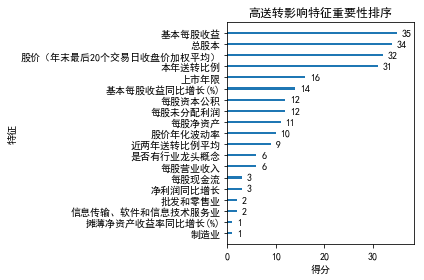

In [24]:
# 特征重要性
from xgboost import plot_importance
import matplotlib.pyplot as plt
# 解决中文和负号显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 使显示图标自适应
plt.rcParams['figure.autolayout'] = True
plot_importance(clf, title='高送转影响特征重要性排序', xlabel='得分', ylabel='特征', grid=False)
plt.show()

In [28]:
# 保存模型
import pickle
file_name = 'Model/XGBoost.dat'
pickle.dump(clf,open(file_name,'wb'))

In [32]:
# 读取模型示例
from xgboost import XGBClassifier
from sklearn.externals import joblib
file_name = 'Model/XGBoost.dat'
model = pickle.load(open(file_name, "rb"))

In [33]:
from sklearn.metrics import accuracy_score,f1_score,recall_score
# 测试集上的预测
pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
print('算法：XGBoost')
print('测试集预测结果：')

cover = mat[1,1]/np.sum(y_train)
acc = mat[1,1]/np.sum(pred)
cover_acc = np.sqrt(cover*acc)
raise_rate = acc/(np.mean(y_test))


print('预测高送转股票数：%d,实际高送转股票数：%d，准确预测的高送转股票数：%d'%(np.sum(pred),np.sum(y_test),mat[1,1]))
print('高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(y_test)))
print('高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：%.2f%%'%(100*mat[1,1]/np.sum(pred)))
print('高送转准确提升度(预测高送转样本中正确预测的比例/所有样本中高送转样本的比例)：%.2f'%(raise_rate))



print()

# 测试集预测的概率得分
proba = model.predict_proba(X_test)
pos_proba = [x[1] for x in proba]
eva = pd.DataFrame()
eva['模型输出概率得分'] = pos_proba
eva['实际是否在次年高送转'] = y_test

eva.sort_values(by = '模型输出概率得分',ascending = False, inplace = True)
print('高送转预测概率最高前10位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:10]),100*np.mean(eva['实际是否在次年高送转'].values[:10])))
print('高送转预测概率最高前25位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:25]),100*np.mean(eva['实际是否在次年高送转'].values[:25])))
print('高送转预测概率最高前50位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:50]),100*np.mean(eva['实际是否在次年高送转'].values[:50])))
print('高送转预测概率最高前100位样本，实际高送转数量为：%d，准确率：%.2f%%'%(np.sum(eva['实际是否在次年高送转'].values[:100]),100*np.mean(eva['实际是否在次年高送转'].values[:100])))
print('total_score:%.5f'%(0.1*cover + 0.5*acc + 0.05*max_10_acc + 0.1*max_25_acc + 0.1*max_50_acc + 0.15*max_100_acc))


算法：XGBoost
测试集预测结果：
预测高送转股票数：150,实际高送转股票数：385，准确预测的高送转股票数：92
高送转覆盖预测率(准确预测的高送转股票数/实际高送转股票数)：23.90%
高送转准确预测率(准确预测的高送转股票数/预测高送转股票数)：61.33%
高送转准确提升度(预测高送转样本中正确预测的比例/所有样本中高送转样本的比例)：4.24

高送转预测概率最高前10位样本，实际高送转数量为：7，准确率：70.00%
高送转预测概率最高前25位样本，实际高送转数量为：17，准确率：68.00%
高送转预测概率最高前50位样本，实际高送转数量为：37，准确率：74.00%
高送转预测概率最高前100位样本，实际高送转数量为：66，准确率：66.00%
total_score:0.61865
